# 승촌보(용봉) 데이터

- 영산강 승촌보(용봉) 데이터 살펴 보기
- 다양한 머신러닝 모델 활용

**지도 위치 확인**

In [2]:
import folium

In [3]:
location_scb = [35.0648971, 126.7668732]  #승촌보? 위치
location_jsb = [34.9744001, 126.6238732]  #죽산보? 위치

m = folium.Map(location=[35.030202246719, 126.68506948827], zoom_start = 13)
folium.Marker(location_scb).add_to(m)
folium.Marker(location_jsb).add_to(m)
m.save('map.html')
#m

# 필요한 라이브러리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
import platform
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정
if platform.system() == 'Windows': # 윈도우
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
elif platform.system() == 'Linux': # 우분투 또는 구글 코랩
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    applyfont = "NanumBarunGothic"
    import matplotlib.font_manager as fm
    if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
        fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=applyfont)
    plt.rc("axes", unicode_minus=False)

# 데이터 가져오기

In [1]:
base_path = '/content/drive/MyDrive/water_data/'

## 승촌보 자료를 데이터프레임으로 만들기  

* `skiprows=0`: 0번 행 무시. 모든 워크시트 대상.
* `header=1`: 1번 행을 header로 지정, 즉 열 인덱스로 사용.
* `sheet_name=None`: 모든 워크시트 가져오기. 워크시트별로 하나의 df 생성. 반환값은 사전.
* `na_values='ND'`: ND(No Data/Not Determinded) 또한 결측치로 처리. 용조산소 열에 포함되어 있음.
* `index_col=0`: 측정일을 행 인덱스로 사용
* `parse_dates=True`: 행 인덱스로 사용되는 날짜 대상 파싱 실행

In [ ]:
scb_yearly = pd.read_excel(base_path+"Seungchonbo.xlsx", 
                            skiprows=0, 
                            header=1, 
                            sheet_name=None,
                            na_values='ND',
                            parse_dates=True)  # index_col = 0을 제외함

In [ ]:
print(type(scb_yearly))  # type-dict
print(scb_yearly.keys())  # 2012년부터 2022년까지

<class 'dict'>
dict_keys(['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'])


### 승촌보 데이터프레임 확인

In [ ]:
scb_yearly['2012년'].head()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
0,2012-07-01 00h,용봉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-07-01 01h,용봉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-07-01 02h,용봉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-07-01 03h,용봉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-07-01 04h,용봉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(scb_yearly['2012년'].columns)

Index(['측정일/월', '측정소명', '수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥'],
      dtype='object')


### 연도별 기본 정보 확인 - info, describe

In [ ]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m')
    print(scb_yearly[year].info())
    print('='*50)

 2012년 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   측정일/월        4343 non-null   object 
 1   측정소명         4343 non-null   object 
 2   수온 ℃         2218 non-null   float64
 3   수소이온농도       2218 non-null   float64
 4   전기전도도 μS/cm  2216 non-null   float64
 5   용존산소 mg/L    2218 non-null   float64
 6   총유기탄소 mg/L   2122 non-null   float64
 7   총질소 mg/L     0 non-null      float64
 8   총인 mg/L      0 non-null      float64
 9   클로로필-a mg/㎥  2270 non-null   float64
dtypes: float64(8), object(2)
memory usage: 339.4+ KB
None
 2013년 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   측정일/월        8750 non-null   object 
 1   측정소명         8750 non-null   object 
 2   수온 ℃         8052 non-null   float

In [ ]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m')
    print(scb_yearly[year].describe())
    print('='*50)

 2012년 
              수온 ℃       수소이온농도  전기전도도 μS/cm    용존산소 mg/L   총유기탄소 mg/L  \
count  2218.000000  2218.000000  2216.000000  2218.000000  2122.000000   
mean     13.862669     7.025789   287.684567     8.371100     2.880443   
std       6.405126     0.438518    56.154883     2.438562     0.559138   
min       2.400000     6.300000   129.000000     1.700000     1.400000   
25%       8.200000     6.700000   242.750000     6.600000     2.500000   
50%      14.100000     6.900000   301.000000     8.200000     2.800000   
75%      19.500000     7.200000   328.000000    10.300000     3.200000   
max      26.400000     9.400000   416.000000    14.800000     5.200000   

       총질소 mg/L  총인 mg/L  클로로필-a mg/㎥  
count       0.0      0.0  2270.000000  
mean        NaN      NaN    25.953304  
std         NaN      NaN    24.910793  
min         NaN      NaN     1.400000  
25%         NaN      NaN     9.900000  
50%         NaN      NaN    12.600000  
75%         NaN      NaN    44.700000  
max  

### 송촌보 자료의 결측치 확인

#### 연도별 데이터 수(결측치 포함)

* 2012년은 9월 20일 데이터부터 있고, 그 이후에도 결측치 있음.
* 2022년은 5월 23일 데이터까지 있음.

In [ ]:
for year in scb_yearly:
    print(year, ':', len(scb_yearly[year]))

2012년 : 4343
2013년 : 8750
2014년 : 8760
2015년 : 8739
2016년 : 8784
2017년 : 8730
2018년 : 8758
2019년 : 8760
2020년 : 8784
2021년 : 8760
2022년 : 3432


#### 연도별 변수별 결측치 개수 확인

In [ ]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m', '(개수)')
    print(scb_yearly[year].notnull().sum())
    print('='*50)

 2012년  (개수)
측정일/월          4343
측정소명           4343
수온 ℃           2218
수소이온농도         2218
전기전도도 μS/cm    2216
용존산소 mg/L      2218
총유기탄소 mg/L     2122
총질소 mg/L          0
총인 mg/L           0
클로로필-a mg/㎥    2270
dtype: int64
 2013년  (개수)
측정일/월          8750
측정소명           8750
수온 ℃           8052
수소이온농도         8052
전기전도도 μS/cm    8050
용존산소 mg/L      7935
총유기탄소 mg/L     8042
총질소 mg/L       5993
총인 mg/L        6048
클로로필-a mg/㎥    7109
dtype: int64
 2014년  (개수)
측정일/월          8760
측정소명           8760
수온 ℃           8264
수소이온농도         8264
전기전도도 μS/cm    8247
용존산소 mg/L      8179
총유기탄소 mg/L     5826
총질소 mg/L       8158
총인 mg/L        8197
클로로필-a mg/㎥    8142
dtype: int64
 2015년  (개수)
측정일/월          8739
측정소명           8739
수온 ℃           8378
수소이온농도         8381
전기전도도 μS/cm    8377
용존산소 mg/L      8107
총유기탄소 mg/L     7968
총질소 mg/L       8223
총인 mg/L        8124
클로로필-a mg/㎥    8416
dtype: int64
 2016년  (개수)
측정일/월          8784
측정소명           8784
수온 ℃           8168
수소이온농도         8167
전기전

#### 연도별 변수별 결측치 비율 확인

* <font color='blue'>2012년</font>은 총질소와 총인의 데이터가 전혀 없음. → <font color='red'>두 항목 없이 분석하던가 2012년을 분석에서 제외</font>
* <font color='blue'>2018년</font>은 데이터도 20% 내외의 데이터만 있음.
* <font color='blue'>2019년</font>은 50~60% 정도의 데이터가 있음.

In [ ]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m', '(%)')
    print(scb_yearly[year].notnull().sum() * 100/len(scb_yearly[year]))
    print('='*50)

 2012년  (%)
측정일/월          100.000000
측정소명           100.000000
수온 ℃            51.070688
수소이온농도          51.070688
전기전도도 μS/cm     51.024637
용존산소 mg/L       51.070688
총유기탄소 mg/L      48.860235
총질소 mg/L         0.000000
총인 mg/L          0.000000
클로로필-a mg/㎥     52.268017
dtype: float64
 2013년  (%)
측정일/월          100.000000
측정소명           100.000000
수온 ℃            92.022857
수소이온농도          92.022857
전기전도도 μS/cm     92.000000
용존산소 mg/L       90.685714
총유기탄소 mg/L      91.908571
총질소 mg/L        68.491429
총인 mg/L         69.120000
클로로필-a mg/㎥     81.245714
dtype: float64
 2014년  (%)
측정일/월          100.000000
측정소명           100.000000
수온 ℃            94.337900
수소이온농도          94.337900
전기전도도 μS/cm     94.143836
용존산소 mg/L       93.367580
총유기탄소 mg/L      66.506849
총질소 mg/L        93.127854
총인 mg/L         93.573059
클로로필-a mg/㎥     92.945205
dtype: float64
 2015년  (%)
측정일/월          100.000000
측정소명           100.000000
수온 ℃            95.869093
수소이온농도          95.903421
전기전도도 μS/cm     95.8576

#### 연도별 클로로필 데이터의 수

* 2018년도 데이터의 수가 적다




In [ ]:
lst_scb_yearly_w_chlo = []

for year in scb_yearly:
    print(year, ':', sum(scb_yearly[year]['클로로필-a mg/㎥'].notnull()))
    lst_scb_yearly_w_chlo.append(sum(scb_yearly[year]['클로로필-a mg/㎥'].notnull()))

2012년 : 2270
2013년 : 7109
2014년 : 8142
2015년 : 8416
2016년 : 8186
2017년 : 7185
2018년 : 2038
2019년 : 5243
2020년 : 5854
2021년 : 7441
2022년 : 3262


#### 결측치 처리하기

* 2012년 자료는 일단 보류함.  
  
(확인) 다음 중 하나를 선택?  
* <font color='red'>클로로필 데이터가 있는 자료만 사용</font>(바로 위에서 구함)
* <font color='red'>전체 데이터가 있는 자료만 사용</font>


##### 전체 데이터가 있는 자료의 수

In [ ]:
lst_scb_yearly_w_all = []

for year in scb_yearly:
    print(year, ':', len(scb_yearly[year].copy().dropna()))
    lst_scb_yearly_w_all.append(len(scb_yearly[year].copy().dropna()))

2012년 : 0
2013년 : 5333
2014년 : 5298
2015년 : 7289
2016년 : 7154
2017년 : 6096
2018년 : 1427
2019년 : 4007
2020년 : 4350
2021년 : 5925
2022년 : 2254


##### 클로로필 데이터가 있는 데이터프레임 vs 전체 데이터가 있는 데이터프레임 길이 비교

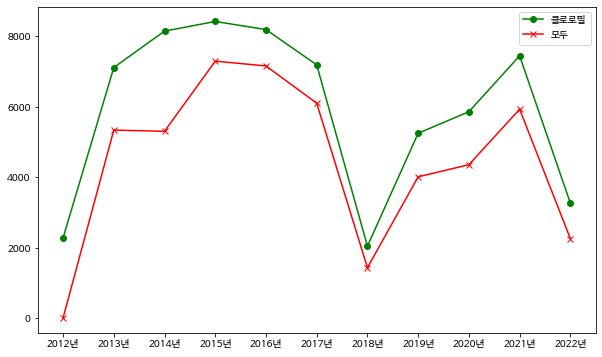

In [ ]:
plt.plot(list(scb_yearly.keys()), lst_scb_yearly_w_chlo, marker = 'o', color = 'green')
plt.plot(list(scb_yearly.keys()), lst_scb_yearly_w_all, marker = 'x', color = 'red')

plt.legend(['클로로필', '모두'])
plt.show()

**모든 변수에서 결측치가 없는 데이터를 활용하면, 클로로필만 있는 데이터를 사용할 때보다 최대 2844개 없는 해(2014년도)가 있음**

In [ ]:
print(np.array(lst_scb_yearly_w_chlo) - np.array(lst_scb_yearly_w_all))
print(max(np.array(lst_scb_yearly_w_chlo) - np.array(lst_scb_yearly_w_all)))

[2270 1776 2844 1127 1032 1089  611 1236 1504 1516 1008]
2844


# 모든 변수에서 결측치가 없는 데이터로 데이터프레임 만들기

* 데이터프레임명 : scb_yearly_w_all

In [ ]:
scb_yearly_w_all = {}

for year in scb_yearly:
    scb_yearly_w_all[year] = scb_yearly[year].copy().dropna()

In [ ]:
print(type(scb_yearly_w_all))
print(scb_yearly_w_all.keys())

<class 'dict'>
dict_keys(['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'])


scb_yearly_w_all의 각 연도별 데이터의 수

In [ ]:
for year in scb_yearly_w_all:
    print('\033[43m', year,'\033[0m', end = ' ')
    print(len(scb_yearly_w_all[year]))

 2012년  0
 2013년  5333
 2014년  5298
 2015년  7289
 2016년  7154
 2017년  6096
 2018년  1427
 2019년  4007
 2020년  4350
 2021년  5925
 2022년  2254


## 클로로필 변화_선그래프

In [ ]:
scb_yearly_w_all['2015년'].columns

Index(['측정일/월', '측정소명', '수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥'],
      dtype='object')

In [ ]:
x, y = [], []

for year in list(scb_yearly_w_all.keys())[1:]:
    x += list(scb_yearly_w_all[year]['측정일/월'])
    y += list(scb_yearly_w_all[year]['클로로필-a mg/㎥']) 

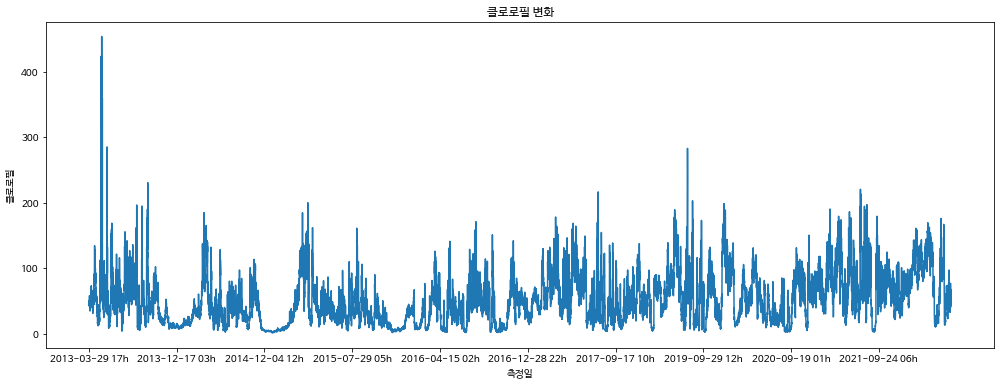

In [ ]:
fig = plt.figure(figsize=(17, 6))

plt.plot(x, y)
plt.xticks(x[::5000])

plt.title('클로로필 변화')
plt.xlabel('측정일')
plt.ylabel('클로로필')

plt.show()

In [ ]:
print(f'{x[y.index(max(y))]}에 클로로필 수치가 {max(y)}로 가장 높음')

2013-05-07 14h에 클로로필 수치가 453.5로 가장 높음


**<font color="red">2013년 5월 7일 14시에 클로로필 수치가 453.5로 가장 높음</font>**

* 2013년 5월 7일 12시 클로로필 159.7
* 2013년 5월 7일 13시 클로로필 190
* 2013년 5월 7일 14시 클로로필 453.5
* 2013년 5월 7일 15시, 16시, 17시 클로로필 결측
* 2013년 5월 7일 18시 클로로필 227 

2013년 5월 7일 14시 자료는 <font color="blue">이상치</font>로 판단됨. 

* 2013년을 제외하고 클로로필 수치가 400을 넘어가는 일은 없었음

2013년 5월 7일 10시부터 18시사이 클로로필 수치는?

In [ ]:
scb_yearly_w_all['2013년'][725:730]
#scb_yearly_w_all['2013년'][scb_yearly_w_all['2013년']['클로로필-a mg/㎥'].max() == scb_yearly_w_all['2013년']['클로로필-a mg/㎥']] #3037

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
3035,2013-05-07 12h,용봉,21.0,7.8,353.0,13.7,5.5,3.729,0.177,159.7
3036,2013-05-07 13h,용봉,22.0,8.1,348.0,14.5,5.5,3.754,0.183,190.0
3037,2013-05-07 14h,용봉,22.9,8.5,340.0,16.2,5.6,3.723,0.188,453.5
3042,2013-05-07 19h,용봉,21.6,9.0,340.0,18.6,5.8,3.695,0.202,227.8
3043,2013-05-07 20h,용봉,20.9,8.6,345.0,15.6,6.0,3.259,0.202,212.2


클로로필 차(다음 시간대의 클로로필 - 이전 시간대의 클로로필)를 구해 너무 차이가 심하면, 예를 들어 100 이상이면 이상치로 판단할까?..   
그런데, 아래아래처럼, scb_yearly['2013년'][3008:3020]를 확인하면 다음과 같은 경우도 있음.    
123.3 →  NaN → 236.5 → 409.7 → 423.5 → 384.9 → 236.9 → 175.2 → 169.8 → 167.1 → 151.6  

즉, 차이가 심하지 않는 부분도 이상치로 봐야 할 부분들이 있음.

In [ ]:
scb_yearly['2013년'][3034:3050]

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
3034,2013-05-07 11h,용봉,20.9,7.5,355.0,12.2,5.5,3.643,0.174,68.4
3035,2013-05-07 12h,용봉,21.0,7.8,353.0,13.7,5.5,3.729,0.177,159.7
3036,2013-05-07 13h,용봉,22.0,8.1,348.0,14.5,5.5,3.754,0.183,190.0
3037,2013-05-07 14h,용봉,22.9,8.5,340.0,16.2,5.6,3.723,0.188,453.5
3038,2013-05-07 15h,용봉,23.5,9.1,335.0,19.9,5.5,3.725,0.192,NaN
3039,2013-05-07 16h,용봉,23.0,9.1,337.0,19.6,5.5,3.725,0.197,NaN
3040,2013-05-07 17h,용봉,NaN,NaN,NaN,NaN,NaN,NaN,0.202,NaN
3041,2013-05-07 18h,용봉,22.1,9.0,341.0,19.1,5.8,NaN,NaN,275.0
3042,2013-05-07 19h,용봉,21.6,9.0,340.0,18.6,5.8,3.695,0.202,227.8
3043,2013-05-07 20h,용봉,20.9,8.6,345.0,15.6,6.0,3.259,0.202,212.2


<font size="red"> </font>

In [ ]:
scb_yearly['2013년'][3008:3020]

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
3008,2013-05-06 09h,용봉,19.4,7.1,350.0,11.5,5.2,4.285,0.145,70.3
3009,2013-05-06 10h,용봉,19.7,7.3,353.0,13.6,5.2,4.288,0.147,123.3
3010,2013-05-06 11h,용봉,NaN,NaN,NaN,NaN,NaN,4.298,0.148,NaN
3011,2013-05-06 12h,용봉,20.8,8.1,343.0,15.9,4.9,4.516,0.151,236.5
3012,2013-05-06 13h,용봉,21.2,8.3,343.0,16.0,5.0,4.624,0.155,409.7
3013,2013-05-06 14h,용봉,21.7,8.5,341.0,16.5,4.9,4.747,0.158,423.5
3014,2013-05-06 15h,용봉,21.6,8.5,340.0,16.6,5.0,4.838,0.158,384.9
3015,2013-05-06 16h,용봉,20.9,8.4,340.0,15.7,5.1,4.794,0.154,236.9
3016,2013-05-06 17h,용봉,20.5,8.2,343.0,14.2,5.0,4.681,0.154,175.2
3017,2013-05-06 18h,용봉,20.3,8.1,344.0,14.1,5.0,4.635,0.153,169.8


**클로로필의 기초통계량을 살펴보자.**
* 아래는 결측치 처리 후 자료임(모든 변수가 있지 않으면 삭제함.)

In [ ]:
pd.DataFrame(y).describe()

,0
count,49133.000000
mean,50.186111
std,36.624205
min,1.000000
25%,21.100000
50%,42.800000
75%,72.100000
max,453.500000


상자그림을 그려보면 이상치가 매우 많은 것을 확인 가능함

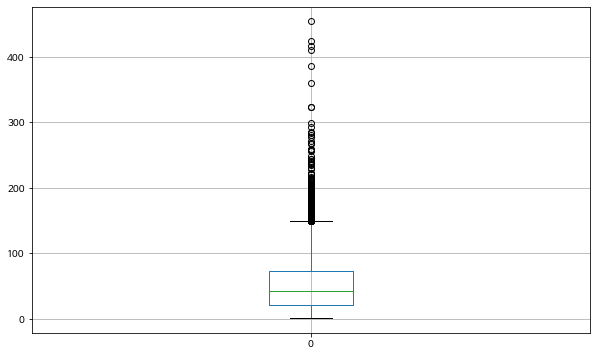

In [ ]:
pd.DataFrame(y).boxplot()
plt.show()

위 상자그림에서 이상치는 몇 개일까?   
총 49133 중 616개의 이상치가 발견됨.

In [ ]:
df_y = pd.DataFrame(y, columns = ['y'])
print(len(df_y))
q3 = df_y.quantile(0.75)
q1 = df_y.quantile(0.25)
iqr = q3 + 1.5*(q3 - q1)

df_y[df_y.y > float(iqr)]

49133


,y
681,267.6
682,239.8
702,236.5
703,409.7
704,423.5
...,...
48551,169.0
48552,158.2
48701,166.8
48702,154.7


결측치 제거 전 이상치를 같은 방식으로 제거해도.. 삭제되는 값이 크게 달라지지 않을 듯..

In [ ]:
z = []

for year in scb_yearly:
    z += list(scb_yearly[year]['클로로필-a mg/㎥']) 

In [ ]:
len(z)

86600

In [ ]:
pd.DataFrame(z).describe()

,0
count,65146.000000
mean,50.098037
std,37.327483
min,1.000000
25%,19.600000
50%,42.200000
75%,73.100000
max,453.500000


In [ ]:
df_z = pd.DataFrame(z, columns = ['z'])
q3 = df_z.quantile(0.75)
q1 = df_z.quantile(0.25)
iqr_z = q3 + 1.5*(q3 - q1)

df_z[df_z.z > float(iqr_z)]

,z
7332,267.6
7333,239.8
7354,236.5
7355,409.7
7356,423.5
...,...
85582,156.4
85583,161.2
85584,163.5
85585,166.8


## 사분위수를 이용해 이상치를 제거

In [ ]:
scb_yearly_wo_outlier = {}

for year in scb_yearly_w_all:
    scb_yearly_wo_outlier[year] = scb_yearly_w_all[year][scb_yearly_w_all[year]['클로로필-a mg/㎥'] < float(iqr)]

**각 연도별 데이터의 수**

In [ ]:
for year in scb_yearly_w_all:
    print('\033[43m', year,'\033[0m', end = ' ')
    print(len(scb_yearly_wo_outlier[year]))

 2012년  0
 2013년  5253
 2014년  5282
 2015년  7272
 2016년  7149
 2017년  6044
 2018년  1427
 2019년  3777
 2020년  4350
 2021년  5799
 2022년  2164


In [ ]:
x1, y1 = [], []

for year in list(scb_yearly_wo_outlier.keys())[1:]:
    x1 += list(scb_yearly_wo_outlier[year]['측정일/월'])
    y1 += list(scb_yearly_wo_outlier[year]['클로로필-a mg/㎥']) 

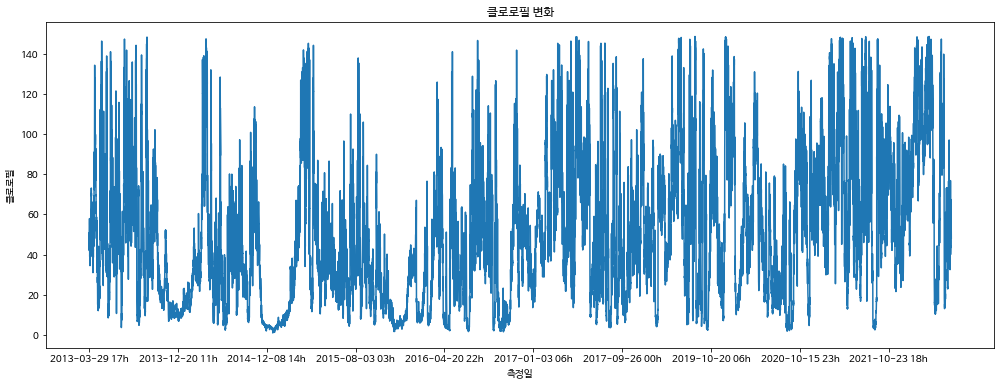

In [ ]:
fig = plt.figure(figsize=(17, 6))

plt.plot(x1, y1)
plt.xticks(x1[::5000])

plt.title('클로로필 변화')
plt.xlabel('측정일')
plt.ylabel('클로로필')

plt.show()

In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    scb_yearly_wo_outlier[year]['월일시'] = 0
    scb_yearly_wo_outlier[year]['월일시'] = scb_yearly_wo_outlier[year]['측정일/월'].apply(lambda x : x[5:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


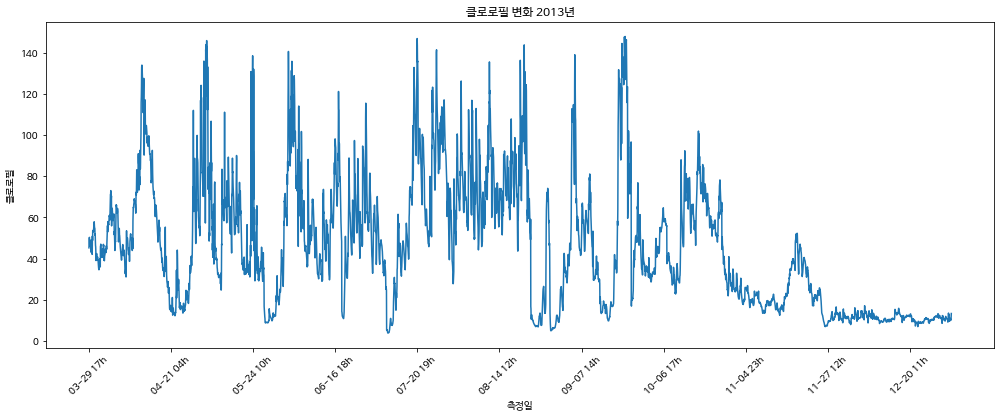

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2013년']['월일시'], scb_yearly_wo_outlier['2013년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2013년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2013년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

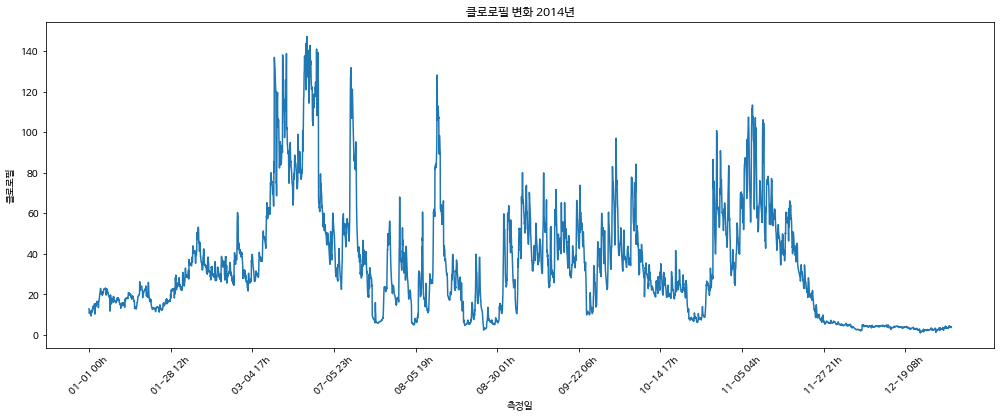

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2014년']['월일시'], scb_yearly_wo_outlier['2014년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2014년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2014년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

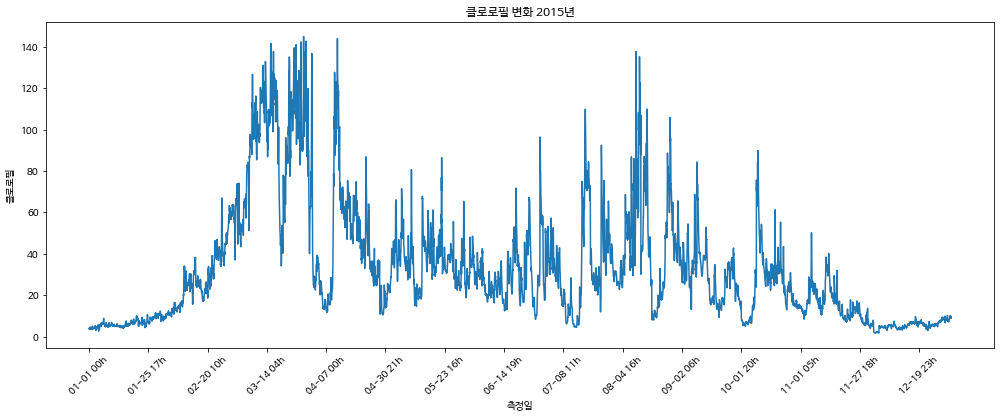

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2015년']['월일시'], scb_yearly_wo_outlier['2015년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2015년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2015년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

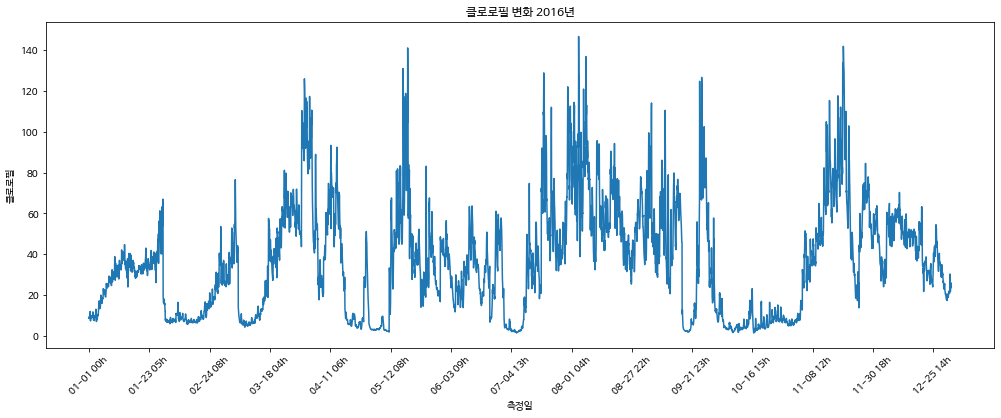

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2016년']['월일시'], scb_yearly_wo_outlier['2016년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2016년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2016년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

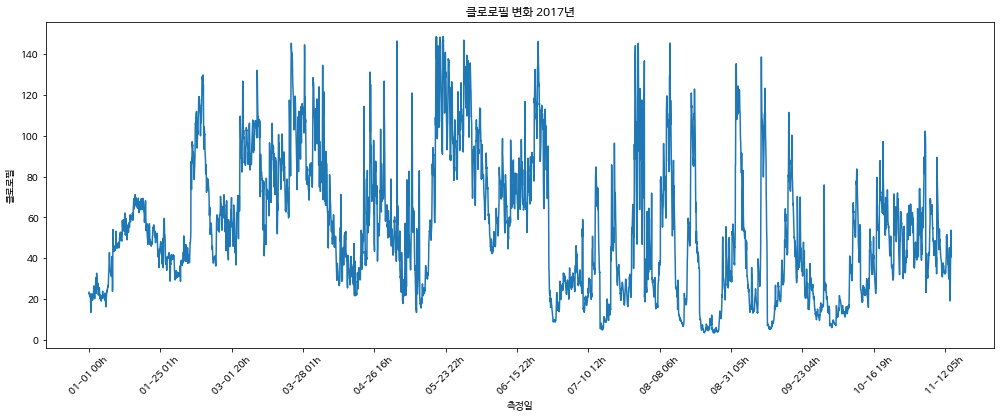

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2017년']['월일시'], scb_yearly_wo_outlier['2017년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2017년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2017년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

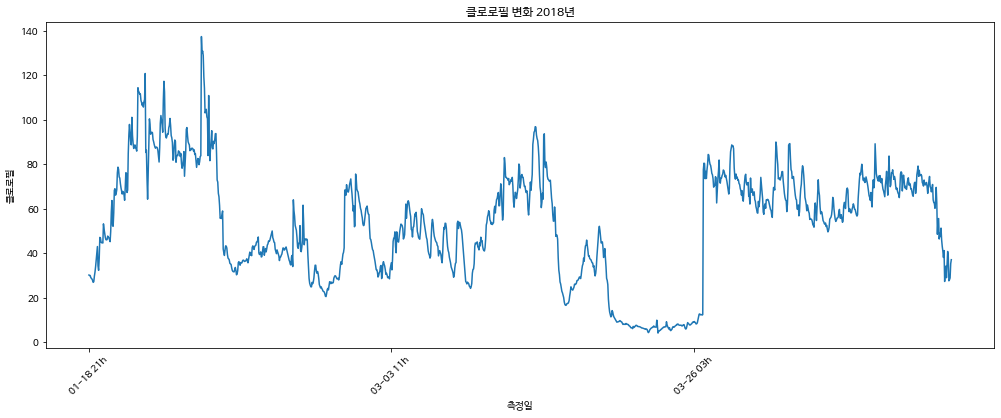

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2018년']['월일시'], scb_yearly_wo_outlier['2018년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2018년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2018년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

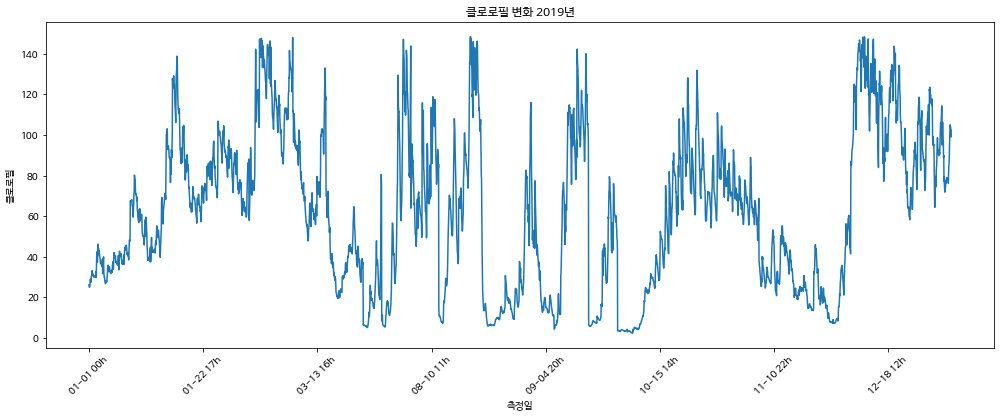

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2019년']['월일시'], scb_yearly_wo_outlier['2019년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2019년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2019년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

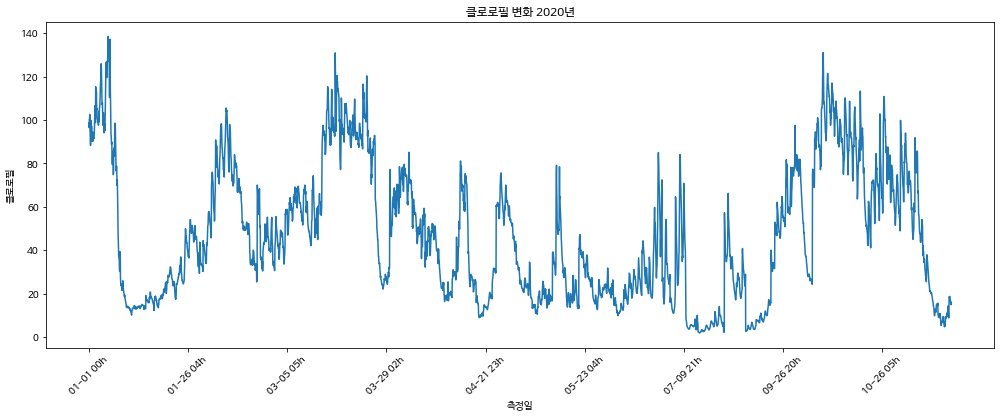

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2020년']['월일시'], scb_yearly_wo_outlier['2020년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2020년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2020년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

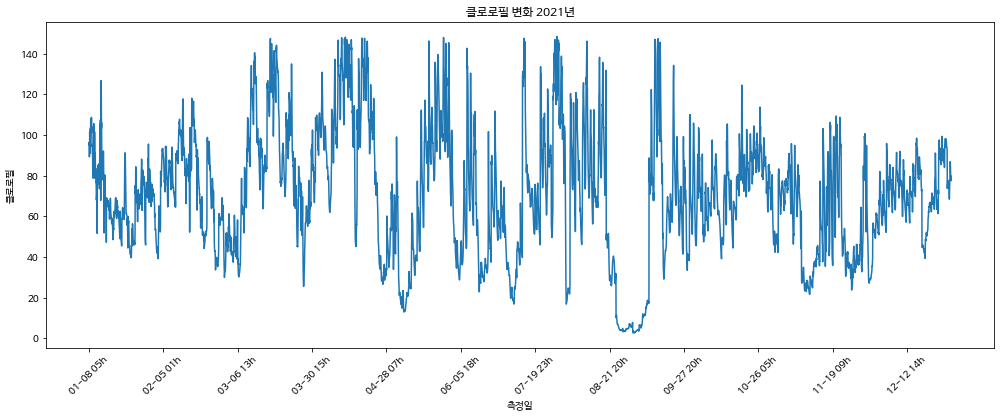

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2021년']['월일시'], scb_yearly_wo_outlier['2021년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2021년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2021년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

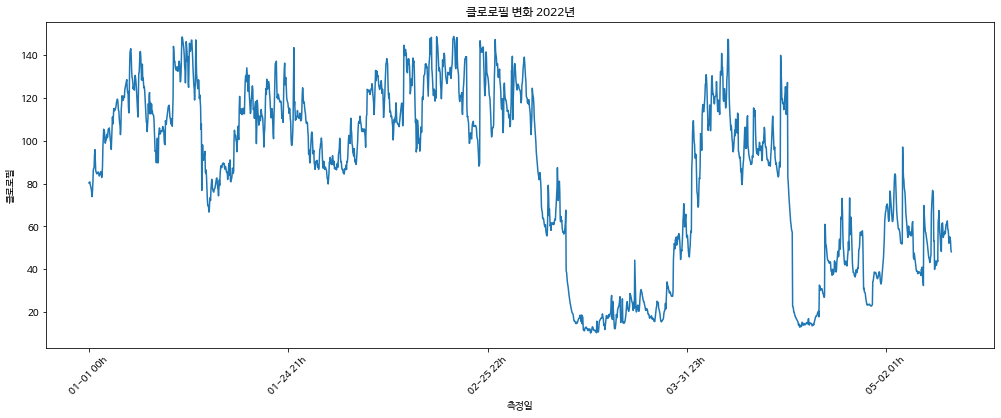

In [ ]:
fig = plt.figure(figsize=(17, 6))
plt.plot(scb_yearly_wo_outlier['2022년']['월일시'], scb_yearly_wo_outlier['2022년']['클로로필-a mg/㎥'])
plt.xticks(scb_yearly_wo_outlier['2022년']['월일시'][::500], rotation = 45)
plt.title('클로로필 변화 2022년')
plt.xlabel('측정일')
plt.ylabel('클로로필')
plt.show()

In [ ]:
scb_yearly_wo_outlier['2013년'].head()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥,월일시
2104,2013-03-29 17h,용봉,12.6,6.8,293.0,5.5,3.3,5.850,0.105,45.2,03-29 17h
2105,2013-03-29 18h,용봉,12.7,6.8,298.0,5.8,3.4,5.809,0.106,48.0,03-29 18h
2106,2013-03-29 19h,용봉,12.7,6.8,299.0,5.9,3.4,5.822,0.107,50.1,03-29 19h
2107,2013-03-29 20h,용봉,12.5,6.8,299.0,5.9,3.3,5.812,0.106,50.3,03-29 20h
2108,2013-03-29 21h,용봉,12.3,6.8,300.0,5.8,3.3,5.847,0.105,48.6,03-29 21h


In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    scb_yearly_wo_outlier[year]['연월일'] = 0
    scb_yearly_wo_outlier[year]['월일'] = 0
    scb_yearly_wo_outlier[year]['연월일'] = scb_yearly_wo_outlier[year]['측정일/월'].apply(lambda x : x[:-4])
    scb_yearly_wo_outlier[year]['월일'] = scb_yearly_wo_outlier[year]['측정일/월'].apply(lambda x : x[5:-4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
scb_yearly_wo_outlier['2013년'].head()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥,월일시,연월일,월일
2104,2013-03-29 17h,용봉,12.6,6.8,293.0,5.5,3.3,5.850,0.105,45.2,03-29 17h,2013-03-29,03-29
2105,2013-03-29 18h,용봉,12.7,6.8,298.0,5.8,3.4,5.809,0.106,48.0,03-29 18h,2013-03-29,03-29
2106,2013-03-29 19h,용봉,12.7,6.8,299.0,5.9,3.4,5.822,0.107,50.1,03-29 19h,2013-03-29,03-29
2107,2013-03-29 20h,용봉,12.5,6.8,299.0,5.9,3.3,5.812,0.106,50.3,03-29 20h,2013-03-29,03-29
2108,2013-03-29 21h,용봉,12.3,6.8,300.0,5.8,3.3,5.847,0.105,48.6,03-29 21h,2013-03-29,03-29


In [ ]:
scb_yearly_wo_outlier_chlo = {}

scb_yearly_wo_outlier_chlo['2013년'] = pd.Series(0.0, index = pd.date_range('2013-01-01', '2013-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2014년'] = pd.Series(0.0, index = pd.date_range('2014-01-01', '2014-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2015년'] = pd.Series(0.0, index = pd.date_range('2015-01-01', '2015-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2016년'] = pd.Series(0.0, index = pd.date_range('2016-01-01', '2016-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2017년'] = pd.Series(0.0, index = pd.date_range('2017-01-01', '2017-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2018년'] = pd.Series(0.0, index = pd.date_range('2018-01-01', '2018-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2019년'] = pd.Series(0.0, index = pd.date_range('2019-01-01', '2019-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2020년'] = pd.Series(0.0, index = pd.date_range('2020-01-01', '2020-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2021년'] = pd.Series(0.0, index = pd.date_range('2021-01-01', '2021-12-31').astype('str'))
scb_yearly_wo_outlier_chlo['2022년'] = pd.Series(0.0, index = pd.date_range('2022-01-01', '2022-12-31').astype('str'))

In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    scb_yearly_wo_outlier_chlo[year] = pd.DataFrame(scb_yearly_wo_outlier_chlo[year], columns = ['클로로필-a mg/㎥'])
    scb_yearly_wo_outlier_chlo[year]['수온 ℃'] = 0.0
    for i in scb_yearly_wo_outlier_chlo[year].index:
        try:
            scb_yearly_wo_outlier_chlo[year]['클로로필-a mg/㎥'][i] = scb_yearly_wo_outlier[year].groupby('월일')['클로로필-a mg/㎥'].mean()[i[5:]]
            scb_yearly_wo_outlier_chlo[year]['수온 ℃'][i] =  scb_yearly_wo_outlier[year].groupby('월일')['수온 ℃'].mean()[i[5:]]

        except:
            continue

In [ ]:
for year in scb_yearly_wo_outlier_chlo:
    scb_yearly_wo_outlier_chlo[year].reset_index(inplace = True)
    scb_yearly_wo_outlier_chlo[year]['월일'] = scb_yearly_wo_outlier_chlo[year]['index'].apply(lambda x : x[5:])

In [ ]:
scb_yearly_wo_outlier_chlo['2015년'].head()

,index,클로로필-a mg/㎥,수온 ℃,월일
0,2015-01-01,3.850000,5.915000,01-01
1,2015-01-02,4.000000,5.654167,01-02
2,2015-01-03,4.112500,5.495833,01-03
3,2015-01-04,4.466667,6.004167,01-04
4,2015-01-05,5.847619,6.042857,01-05


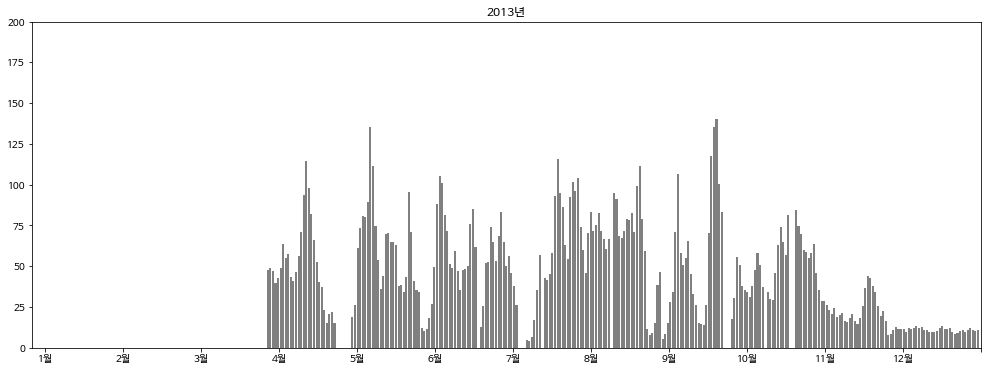

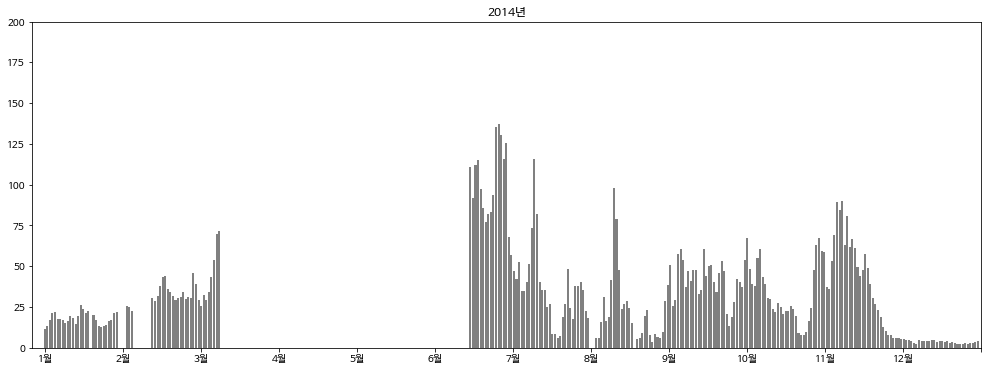

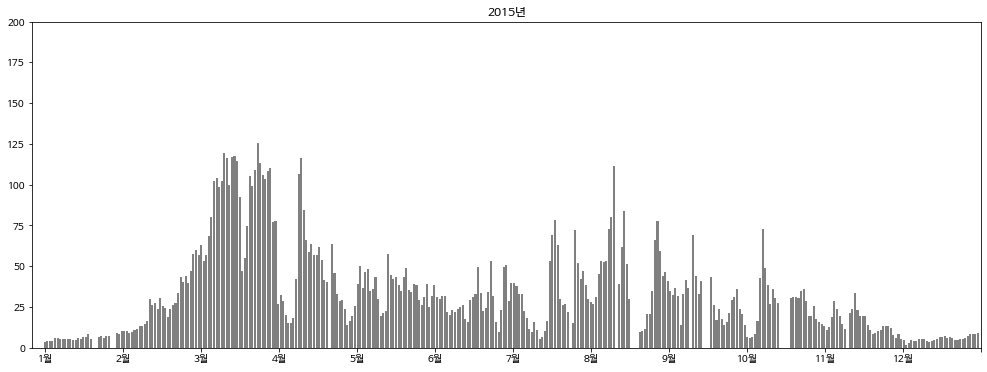

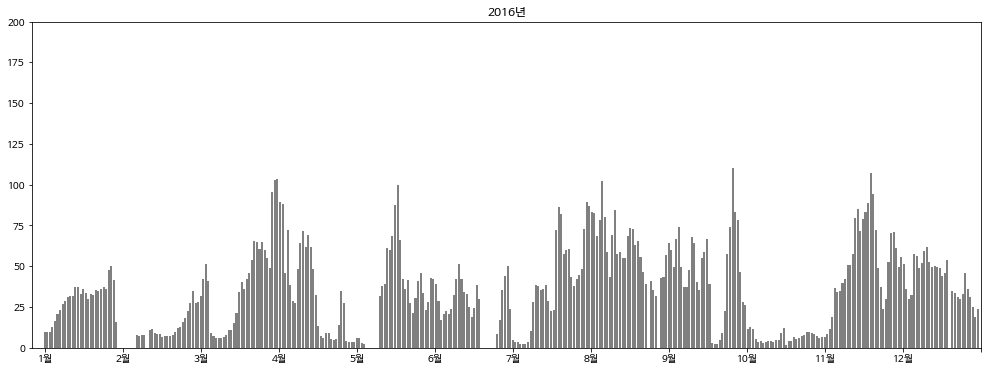

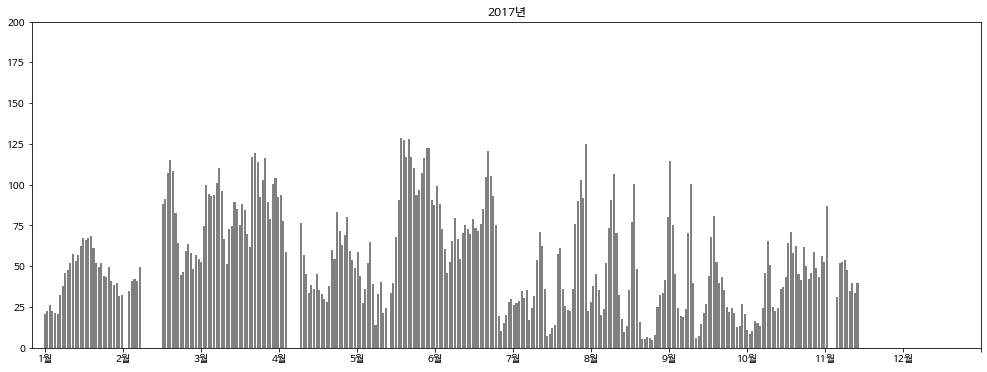

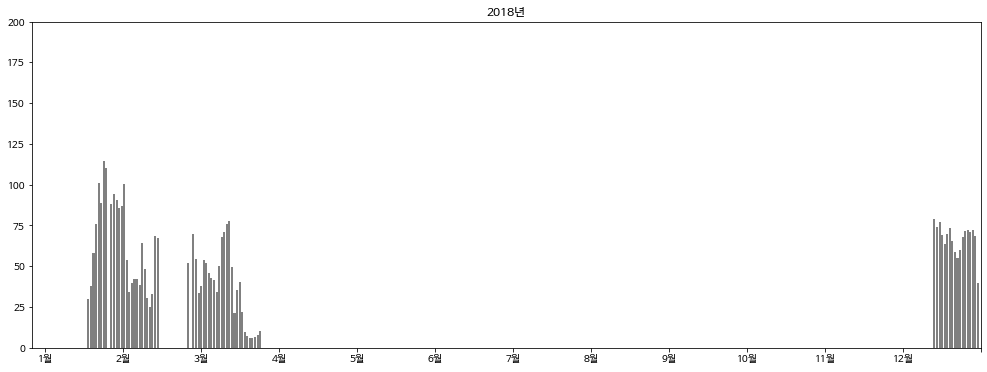

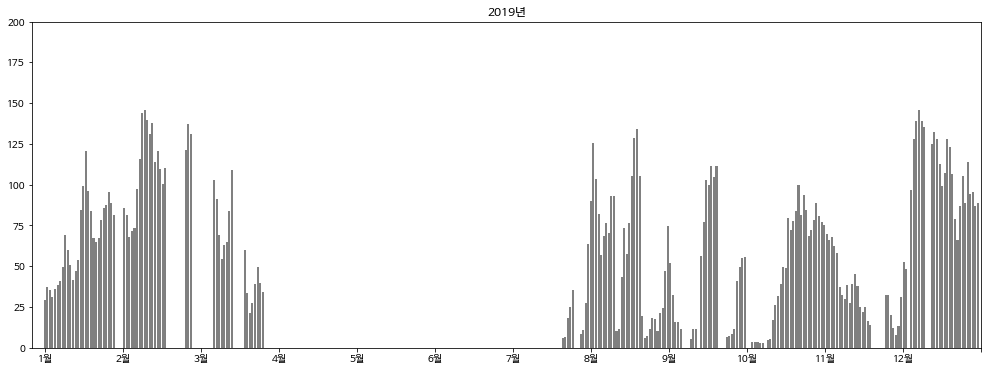

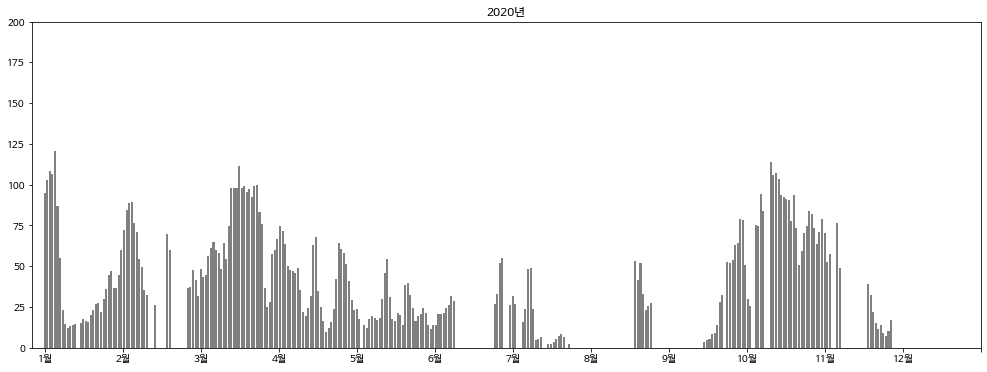

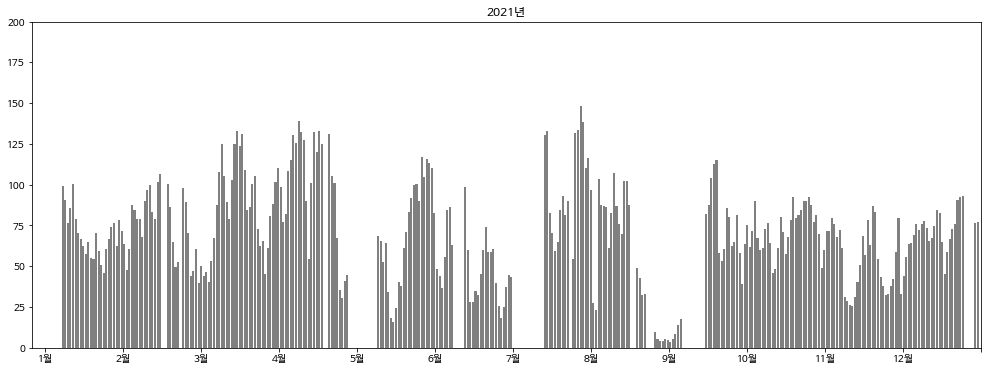

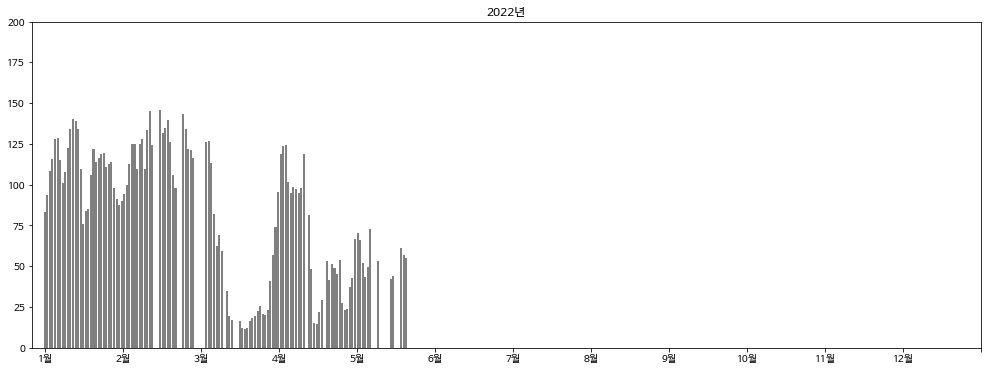

In [ ]:
month = [str(i)+'월' for i in range(1, 13)]

for year in scb_yearly_wo_outlier_chlo:
    fig = plt.figure(figsize=(17,6))
    plt.title(str(year))
    plt.axis([-5, 365, 0, 200])
    plt.bar(scb_yearly_wo_outlier_chlo[year]['월일'], scb_yearly_wo_outlier_chlo[year]['클로로필-a mg/㎥'], color = 'gray')
    #plt.plot(scb_yearly_wo_outlier_chlo[year]['월일'], scb_yearly_wo_outlier_chlo[year]['수온 ℃'], color = 'red')
    #plt.legend(['수온 ℃', '클로로필-a mg/㎥'])
    if year in ['2016년', '2020년']:
        plt.xticks(np.linspace(0,366,13), month)
    else:
        plt.xticks(np.linspace(0,365,13), month)
    plt.show()

## 랜덤포레스트(회귀)

* 연도별 차이는 있으나 수소이온농도과 용존산소가 중요변수로 나옴

In [ ]:
scb_yearly_wo_outlier['2013년'].loc[:, '수온 ℃':'총인 mg/L'].head()

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L
2104,12.6,6.8,293.0,5.5,3.3,5.850,0.105
2105,12.7,6.8,298.0,5.8,3.4,5.809,0.106
2106,12.7,6.8,299.0,5.9,3.4,5.822,0.107
2107,12.5,6.8,299.0,5.9,3.3,5.812,0.106
2108,12.3,6.8,300.0,5.8,3.3,5.847,0.105


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    print(year)
    rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True)
    rnd_reg.fit(scb_yearly_wo_outlier[year].loc[:, '수온 ℃':'총인 mg/L'], scb_yearly_wo_outlier[year]['클로로필-a mg/㎥'])
    for score, name in zip(rnd_reg.feature_importances_, scb_yearly_wo_outlier[year].loc[:, '수온 ℃':'총인 mg/L'].columns):
        print(round(score, 2), name)
    print(year, 'oob_scores :', rnd_reg.oob_score_)
    print('='*100)

2013년
0.13 수온 ℃
0.73 수소이온농도
0.06 전기전도도 μS/cm
0.04 용존산소 mg/L
0.02 총유기탄소 mg/L
0.01 총질소 mg/L
0.01 총인 mg/L
2013년 oob_scores : 0.7286903930387277
2014년
0.09 수온 ℃
0.33 수소이온농도
0.05 전기전도도 μS/cm
0.02 용존산소 mg/L
0.31 총유기탄소 mg/L
0.06 총질소 mg/L
0.14 총인 mg/L
2014년 oob_scores : 0.7842081379279728
2015년
0.32 수온 ℃
0.48 수소이온농도
0.02 전기전도도 μS/cm
0.08 용존산소 mg/L
0.03 총유기탄소 mg/L
0.05 총질소 mg/L
0.02 총인 mg/L
2015년 oob_scores : 0.821776535349525
2016년
0.15 수온 ℃
0.56 수소이온농도
0.15 전기전도도 μS/cm
0.07 용존산소 mg/L
0.01 총유기탄소 mg/L
0.0 총질소 mg/L
0.06 총인 mg/L
2016년 oob_scores : 0.756110196131536
2017년
0.05 수온 ℃
0.76 수소이온농도
0.06 전기전도도 μS/cm
0.04 용존산소 mg/L
0.05 총유기탄소 mg/L
0.0 총질소 mg/L
0.04 총인 mg/L
2017년 oob_scores : 0.748759311502069
2018년
0.03 수온 ℃
0.14 수소이온농도
0.04 전기전도도 μS/cm
0.62 용존산소 mg/L
0.0 총유기탄소 mg/L
0.09 총질소 mg/L
0.08 총인 mg/L
2018년 oob_scores : 0.8758829826776208
2019년
0.06 수온 ℃
0.68 수소이온농도
0.1 전기전도도 μS/cm
0.08 용존산소 mg/L
0.01 총유기탄소 mg/L
0.01 총질소 mg/L
0.05 총인 mg/L
2019년 oob_scores : 0.8001215386723772
2020년
0.03 수온 ℃
0.11

**전체 데이터를 대상으로 랜덤포레스트(회귀)를 실시**

* 수소이온농도가 가장 중요, 그 다음 용존산소  
그런데 oob score가 높지 않음.

In [ ]:
# 데이터 합하기
df = pd.DataFrame()

for year in list(scb_yearly_wo_outlier.keys())[1:]:
    df = pd.concat([df, scb_yearly_wo_outlier[year]], ignore_index = True)

df.head()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥,월일시,연월일,월일
0,2013-03-29 17h,용봉,12.6,6.8,293.0,5.5,3.3,5.850,0.105,45.2,03-29 17h,2013-03-29,03-29
1,2013-03-29 18h,용봉,12.7,6.8,298.0,5.8,3.4,5.809,0.106,48.0,03-29 18h,2013-03-29,03-29
2,2013-03-29 19h,용봉,12.7,6.8,299.0,5.9,3.4,5.822,0.107,50.1,03-29 19h,2013-03-29,03-29
3,2013-03-29 20h,용봉,12.5,6.8,299.0,5.9,3.3,5.812,0.106,50.3,03-29 20h,2013-03-29,03-29
4,2013-03-29 21h,용봉,12.3,6.8,300.0,5.8,3.3,5.847,0.105,48.6,03-29 21h,2013-03-29,03-29


In [ ]:
df.tail()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥,월일시,연월일,월일
48512,2022-05-22 13h,용봉,24.6,6.8,461.0,0.7,6.1,7.307,0.089,55.2,05-22 13h,2022-05-22,05-22
48513,2022-05-22 15h,용봉,26.2,6.8,459.0,0.5,6.3,7.388,0.090,54.1,05-22 15h,2022-05-22,05-22
48514,2022-05-22 16h,용봉,26.5,6.8,457.0,0.6,6.4,7.241,0.090,53.4,05-22 16h,2022-05-22,05-22
48515,2022-05-22 17h,용봉,26.2,6.8,457.0,0.5,6.3,7.073,0.091,49.2,05-22 17h,2022-05-22,05-22
48516,2022-05-22 20h,용봉,25.1,6.8,451.0,0.5,6.2,6.900,0.090,48.2,05-22 20h,2022-05-22,05-22


In [ ]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True)
rnd_reg.fit(df.loc[:, '수온 ℃':'총인 mg/L'], df['클로로필-a mg/㎥'])
for score, name in zip(rnd_reg.feature_importances_, df.loc[:, '수온 ℃':'총인 mg/L'].columns):
    print(round(score, 2), name)
print('oob_scores :', rnd_reg.oob_score_)

0.08 수온 ℃
0.54 수소이온농도
0.08 전기전도도 μS/cm
0.21 용존산소 mg/L
0.06 총유기탄소 mg/L
0.03 총질소 mg/L
0.0 총인 mg/L
oob_scores : 0.5503495349648924


In [ ]:
df.columns

Index(['측정일/월', '측정소명', '수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥', '월일시', '연월일', '월일'],
      dtype='object')

**수소이온농도로 랜덤포레스트 수행하면... 중요변수는?**

용존산소와 수온이 나옴..

In [ ]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True)
rnd_reg.fit(df.loc[:, ['수온 ℃', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥']], df['수소이온농도'])
for score, name in zip(rnd_reg.feature_importances_, ['수온 ℃', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥']):
    print(round(score, 2), name)
print('oob_scores :', rnd_reg.oob_score_)

0.36 수온 ℃
0.0 전기전도도 μS/cm
0.61 용존산소 mg/L
0.01 총유기탄소 mg/L
0.01 총질소 mg/L
0.0 총인 mg/L
0.01 클로로필-a mg/㎥
oob_scores : 0.7522585949680667


## 랜덤포레스트(분류)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 분류기준
def gp_func(x):
    a = np.nan
    if x < 9:
        a = 'gp1'
    elif x < 14:
        a = 'gp2'
    elif x < 20:
        a = 'gp3'
    elif x < 35:
        a = 'gp4'
    elif x < 70:
        a = 'gp5'
    elif x >= 70:
        a = 'gp6'
    return a

In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    scb_yearly_wo_outlier[year]['클로로필'] = scb_yearly_wo_outlier[year]['클로로필-a mg/㎥'].transform(gp_func)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    print(year)
    rnd_reg = RandomForestClassifier(n_estimators=500, random_state=42, oob_score = True)
    rnd_reg.fit(scb_yearly_wo_outlier[year].loc[:, '수온 ℃':'총인 mg/L'], scb_yearly_wo_outlier[year]['클로로필'])
    for score, name in zip(rnd_reg.feature_importances_, scb_yearly_wo_outlier[year].loc[:, '수온 ℃':'총인 mg/L'].columns):
        print(round(score, 2), name)
    print(year, 'oob_scores :', rnd_reg.oob_score_)
    print('='*100)

2013년
0.23 수온 ℃
0.13 수소이온농도
0.17 전기전도도 μS/cm
0.14 용존산소 mg/L
0.09 총유기탄소 mg/L
0.12 총질소 mg/L
0.12 총인 mg/L
2013년 oob_scores : 0.9084332762231107
2014년
0.19 수온 ℃
0.08 수소이온농도
0.17 전기전도도 μS/cm
0.13 용존산소 mg/L
0.13 총유기탄소 mg/L
0.15 총질소 mg/L
0.15 총인 mg/L
2014년 oob_scores : 0.9237031427489587
2015년
0.22 수온 ℃
0.11 수소이온농도
0.15 전기전도도 μS/cm
0.13 용존산소 mg/L
0.12 총유기탄소 mg/L
0.15 총질소 mg/L
0.11 총인 mg/L
2015년 oob_scores : 0.9058030803080308
2016년
0.18 수온 ℃
0.13 수소이온농도
0.19 전기전도도 μS/cm
0.16 용존산소 mg/L
0.1 총유기탄소 mg/L
0.12 총질소 mg/L
0.12 총인 mg/L
2016년 oob_scores : 0.9044621625402154
2017년
0.16 수온 ℃
0.13 수소이온농도
0.16 전기전도도 μS/cm
0.18 용존산소 mg/L
0.11 총유기탄소 mg/L
0.12 총질소 mg/L
0.13 총인 mg/L
2017년 oob_scores : 0.9050297816015883
2018년
0.12 수온 ℃
0.13 수소이온농도
0.17 전기전도도 μS/cm
0.22 용존산소 mg/L
0.09 총유기탄소 mg/L
0.14 총질소 mg/L
0.14 총인 mg/L
2018년 oob_scores : 0.900490539593553
2019년
0.17 수온 ℃
0.15 수소이온농도
0.16 전기전도도 μS/cm
0.17 용존산소 mg/L
0.1 총유기탄소 mg/L
0.12 총질소 mg/L
0.13 총인 mg/L
2019년 oob_scores : 0.9274556526343659
2020년
0.15 수온 ℃


**전체 데이터에 대한 랜덤포레스트(분류)**

In [ ]:
# 데이터 합하기
df1 = pd.DataFrame()

for year in list(scb_yearly_wo_outlier.keys())[1:]:
    df1 = pd.concat([df1, scb_yearly_wo_outlier[year]], ignore_index = True)

df1.head()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥,월일시,연월일,월일,클로로필
0,2013-03-29 17h,용봉,12.6,6.8,293.0,5.5,3.3,5.850,0.105,45.2,03-29 17h,2013-03-29,03-29,gp5
1,2013-03-29 18h,용봉,12.7,6.8,298.0,5.8,3.4,5.809,0.106,48.0,03-29 18h,2013-03-29,03-29,gp5
2,2013-03-29 19h,용봉,12.7,6.8,299.0,5.9,3.4,5.822,0.107,50.1,03-29 19h,2013-03-29,03-29,gp5
3,2013-03-29 20h,용봉,12.5,6.8,299.0,5.9,3.3,5.812,0.106,50.3,03-29 20h,2013-03-29,03-29,gp5
4,2013-03-29 21h,용봉,12.3,6.8,300.0,5.8,3.3,5.847,0.105,48.6,03-29 21h,2013-03-29,03-29,gp5


In [ ]:
rnd_reg = RandomForestClassifier(n_estimators=500, random_state=42, oob_score = True)
rnd_reg.fit(df1.loc[:, '수온 ℃':'총인 mg/L'], df1['클로로필'])
for score, name in zip(rnd_reg.feature_importances_, df1.loc[:, '수온 ℃':'총인 mg/L'].columns):
    print(round(score, 2), name)
print('oob_scores :', rnd_reg.oob_score_)

0.17 수온 ℃
0.11 수소이온농도
0.17 전기전도도 μS/cm
0.16 용존산소 mg/L
0.12 총유기탄소 mg/L
0.14 총질소 mg/L
0.13 총인 mg/L
oob_scores : 0.9096811426922522


# 승촌보 유량 데이터 추가하기

In [ ]:
scb_flow_yearly = pd.read_excel(base_path+"승촌보 2012-2022 유량 수위 데이터.xlsx", 
                            header=0, 
                            sheet_name=None,
                            na_values='ND',
                            parse_dates=True)  # index_col = 0을 제외함

In [ ]:
scb_flow_yearly.keys()

dict_keys(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])

In [ ]:
scb_flow_yearly['2013']['시간'].apply(lambda x : x[:-3])

0        2013.01.01 00
1        2013.01.01 00
2        2013.01.01 00
3        2013.01.01 00
4        2013.01.01 00
             ...      
52555    2013.12.31 23
52556    2013.12.31 23
52557    2013.12.31 23
52558    2013.12.31 23
52559    2013.12.31 23
Name: 시간, Length: 52560, dtype: object

In [ ]:
for year in list(scb_flow_yearly.keys())[1:]:
    scb_flow_yearly[year]['연월일시'] = 0
    scb_flow_yearly[year]['연월일시'] = scb_flow_yearly[year]['시간'].apply(lambda x : x[:-3])

In [ ]:
scb_flow_yearly['2013'].head()

,시간,상류수위(EL.m),하류수위(EL.m),유입량(㎥/s),방류량(㎥/s),연월일시
0,2013.01.01 00:00,7.5,3.77,19.82,19.74,2013.01.01 00
1,2013.01.01 00:10,7.5,3.77,19.78,19.76,2013.01.01 00
2,2013.01.01 00:20,7.5,3.77,19.77,19.82,2013.01.01 00
3,2013.01.01 00:30,7.5,3.77,19.77,19.73,2013.01.01 00
4,2013.01.01 00:40,7.5,3.77,19.78,19.79,2013.01.01 00


In [ ]:
scb_flow_yearly_hour = {}

for year in list(scb_flow_yearly.keys())[1:]:
    scb_flow_yearly_hour[year] = scb_flow_yearly[year].groupby('연월일시').mean()

In [ ]:
scb_yearly_wo_outlier['2014년'].head()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥,월일시,연월일,월일,클로로필
0,2014-01-01 00h,용봉,5.8,6.7,412.0,8.4,3.5,6.419,0.058,12.9,01-01 00h,2014-01-01,01-01,gp2
1,2014-01-01 01h,용봉,5.8,6.7,412.0,8.3,3.4,6.358,0.059,12.6,01-01 01h,2014-01-01,01-01,gp2
2,2014-01-01 02h,용봉,5.9,6.7,418.0,8.0,3.4,6.407,0.059,11.4,01-01 02h,2014-01-01,01-01,gp2
3,2014-01-01 03h,용봉,5.9,6.7,421.0,7.8,3.5,6.459,0.059,10.6,01-01 03h,2014-01-01,01-01,gp2
4,2014-01-01 04h,용봉,5.9,6.7,419.0,7.9,3.4,6.486,0.059,11.1,01-01 04h,2014-01-01,01-01,gp2


In [ ]:
scb_flow_yearly_hour['2013'].columns #[' 상류수위(EL.m)']['2013.01.01 00']

Index([' 상류수위(EL.m)', ' 하류수위(EL.m)', ' 유입량(㎥/s)', ' 방류량(㎥/s)'], dtype='object')

In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    scb_yearly_wo_outlier[year]['상류수위(EL.m)'] = 0.0
    scb_yearly_wo_outlier[year]['하류수위(EL.m)'] = 0.0
    scb_yearly_wo_outlier[year]['유입량(㎥/s)'] = 0.0
    scb_yearly_wo_outlier[year]['방류량(㎥/s)'] = 0.0

    for i in scb_yearly_wo_outlier[year].index:
        try:
            ymd = scb_yearly_wo_outlier[year]['측정일/월'][i][:-1].replace('-', '.')
            scb_yearly_wo_outlier[year]['상류수위(EL.m)'][i] = scb_flow_yearly_hour[year[:-1]][' 상류수위(EL.m)'][ymd]
            scb_yearly_wo_outlier[year]['하류수위(EL.m)'][i] = scb_flow_yearly_hour[year[:-1]][' 하류수위(EL.m)'][ymd]
            scb_yearly_wo_outlier[year]['유입량(㎥/s)'][i] = scb_flow_yearly_hour[year[:-1]][' 유입량(㎥/s)'][ymd]
            scb_yearly_wo_outlier[year]['방류량(㎥/s)'][i] = scb_flow_yearly_hour[year[:-1]][' 방류량(㎥/s)'][ymd]
        except:
            continue

## 랜덤포레스트(회귀)

In [ ]:
scb_yearly_wo_outlier['2013년'].columns

Index(['측정일/월', '측정소명', '수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥', '월일시', '연월일', '월일',
       '클로로필', '상류수위(EL.m)', '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)'],
      dtype='object')

In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    print(year)
    cols = ['수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '상류수위(EL.m)', '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)']
    rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True)
    rnd_reg.fit(scb_yearly_wo_outlier[year].loc[:, cols], scb_yearly_wo_outlier[year]['클로로필-a mg/㎥'])
    for score, name in zip(rnd_reg.feature_importances_, cols):
        print(round(score, 2), name)
    print(year, 'oob_scores :', rnd_reg.oob_score_)
    print('='*100)

2013년
0.11 수온 ℃
0.7 수소이온농도
0.04 전기전도도 μS/cm
0.05 용존산소 mg/L
0.0 총유기탄소 mg/L
0.0 총질소 mg/L
0.01 총인 mg/L
0.01 상류수위(EL.m)
0.04 하류수위(EL.m)
0.0 유입량(㎥/s)
0.03 방류량(㎥/s)
2013년 oob_scores : 0.7600069279311148
2014년
0.06 수온 ℃
0.34 수소이온농도
0.03 전기전도도 μS/cm
0.02 용존산소 mg/L
0.31 총유기탄소 mg/L
0.03 총질소 mg/L
0.13 총인 mg/L
0.04 상류수위(EL.m)
0.0 하류수위(EL.m)
0.01 유입량(㎥/s)
0.03 방류량(㎥/s)
2014년 oob_scores : 0.7876724820227715
2015년
0.25 수온 ℃
0.48 수소이온농도
0.02 전기전도도 μS/cm
0.08 용존산소 mg/L
0.04 총유기탄소 mg/L
0.05 총질소 mg/L
0.03 총인 mg/L
0.04 상류수위(EL.m)
0.0 하류수위(EL.m)
0.01 유입량(㎥/s)
0.01 방류량(㎥/s)
2015년 oob_scores : 0.8151854661600892
2016년
0.15 수온 ℃
0.56 수소이온농도
0.14 전기전도도 μS/cm
0.07 용존산소 mg/L
0.01 총유기탄소 mg/L
0.0 총질소 mg/L
0.06 총인 mg/L
0.0 상류수위(EL.m)
0.01 하류수위(EL.m)
0.0 유입량(㎥/s)
0.0 방류량(㎥/s)
2016년 oob_scores : 0.7573033452293424
2017년
0.05 수온 ℃
0.76 수소이온농도
0.06 전기전도도 μS/cm
0.04 용존산소 mg/L
0.05 총유기탄소 mg/L
0.0 총질소 mg/L
0.04 총인 mg/L
0.0 상류수위(EL.m)
0.0 하류수위(EL.m)
0.0 유입량(㎥/s)
0.0 방류량(㎥/s)
2017년 oob_scores : 0.7496364493491527
2018년
0.03

## 랜덤포레스트(분류)

In [ ]:
for year in list(scb_yearly_wo_outlier.keys())[1:]:
    print(year)
    cols = ['수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '상류수위(EL.m)', '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)']
    rnd_reg = RandomForestClassifier(n_estimators=500, random_state=42, oob_score = True)
    rnd_reg.fit(scb_yearly_wo_outlier[year].loc[:, cols], scb_yearly_wo_outlier[year]['클로로필'])
    for score, name in zip(rnd_reg.feature_importances_, cols):
        print(round(score, 2), name)
    print(year, 'oob_scores :', rnd_reg.oob_score_)
    print('='*100)

2013년
0.18 수온 ℃
0.12 수소이온농도
0.12 전기전도도 μS/cm
0.11 용존산소 mg/L
0.06 총유기탄소 mg/L
0.08 총질소 mg/L
0.08 총인 mg/L
0.05 상류수위(EL.m)
0.08 하류수위(EL.m)
0.05 유입량(㎥/s)
0.07 방류량(㎥/s)
2013년 oob_scores : 0.9169998096325909
2014년
0.15 수온 ℃
0.06 수소이온농도
0.12 전기전도도 μS/cm
0.1 용존산소 mg/L
0.09 총유기탄소 mg/L
0.09 총질소 mg/L
0.09 총인 mg/L
0.05 상류수위(EL.m)
0.07 하류수위(EL.m)
0.08 유입량(㎥/s)
0.1 방류량(㎥/s)
2014년 oob_scores : 0.9305187429004165
2015년
0.18 수온 ℃
0.09 수소이온농도
0.11 전기전도도 μS/cm
0.1 용존산소 mg/L
0.09 총유기탄소 mg/L
0.11 총질소 mg/L
0.07 총인 mg/L
0.06 상류수위(EL.m)
0.07 하류수위(EL.m)
0.05 유입량(㎥/s)
0.06 방류량(㎥/s)
2015년 oob_scores : 0.9163916391639164
2016년
0.14 수온 ℃
0.11 수소이온농도
0.14 전기전도도 μS/cm
0.12 용존산소 mg/L
0.07 총유기탄소 mg/L
0.08 총질소 mg/L
0.08 총인 mg/L
0.05 상류수위(EL.m)
0.06 하류수위(EL.m)
0.07 유입량(㎥/s)
0.08 방류량(㎥/s)
2016년 oob_scores : 0.9139739823751574
2017년
0.13 수온 ℃
0.11 수소이온농도
0.12 전기전도도 μS/cm
0.16 용존산소 mg/L
0.09 총유기탄소 mg/L
0.08 총질소 mg/L
0.1 총인 mg/L
0.05 상류수위(EL.m)
0.05 하류수위(EL.m)
0.05 유입량(㎥/s)
0.05 방류량(㎥/s)
2017년 oob_scores : 0.9099933818663137

# 결측치와 이상치를 삭제하지 않고, 결측치는 이전데이터로 넣으면 어떨까?..

In [ ]:
test_dict = {}
for year in scb_yearly:
    test_dict[year] = scb_yearly[year].fillna(method = 'bfill')

In [ ]:
for year in test_dict:
    print(test_dict[year].isnull().sum())

측정일/월             0
측정소명              0
수온 ℃              0
수소이온농도            0
전기전도도 μS/cm       0
용존산소 mg/L         0
총유기탄소 mg/L        0
총질소 mg/L       4343
총인 mg/L        4343
클로로필-a mg/㎥       0
dtype: int64
측정일/월          0
측정소명           0
수온 ℃           0
수소이온농도         0
전기전도도 μS/cm    0
용존산소 mg/L      0
총유기탄소 mg/L     0
총질소 mg/L       0
총인 mg/L        0
클로로필-a mg/㎥    0
dtype: int64
측정일/월          0
측정소명           0
수온 ℃           0
수소이온농도         0
전기전도도 μS/cm    0
용존산소 mg/L      0
총유기탄소 mg/L     0
총질소 mg/L       0
총인 mg/L        0
클로로필-a mg/㎥    0
dtype: int64
측정일/월          0
측정소명           0
수온 ℃           0
수소이온농도         0
전기전도도 μS/cm    0
용존산소 mg/L      0
총유기탄소 mg/L     0
총질소 mg/L       0
총인 mg/L        0
클로로필-a mg/㎥    0
dtype: int64
측정일/월          0
측정소명           0
수온 ℃           0
수소이온농도         0
전기전도도 μS/cm    0
용존산소 mg/L      0
총유기탄소 mg/L     0
총질소 mg/L       0
총인 mg/L        0
클로로필-a mg/㎥    0
dtype: int64
측정일/월             0
측정소명              0
수온 ℃           

In [ ]:
for year in list(test_dict.keys())[1:]:
    print(year)
    rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True)
    rnd_reg.fit(scb_yearly_wo_outlier[year].loc[:, '수온 ℃':'총인 mg/L'], scb_yearly_wo_outlier[year]['클로로필-a mg/㎥'])
    for score, name in zip(rnd_reg.feature_importances_, scb_yearly_wo_outlier[year].loc[:, '수온 ℃':'총인 mg/L'].columns):
        print(round(score, 2), name)
    print(year, 'oob_scores :', rnd_reg.oob_score_)
    print('='*100)

2013년
0.13 수온 ℃
0.73 수소이온농도
0.06 전기전도도 μS/cm
0.04 용존산소 mg/L
0.02 총유기탄소 mg/L
0.01 총질소 mg/L
0.01 총인 mg/L
2013년 oob_scores : 0.7286903930387277
2014년
0.09 수온 ℃
0.33 수소이온농도
0.05 전기전도도 μS/cm
0.02 용존산소 mg/L
0.31 총유기탄소 mg/L
0.06 총질소 mg/L
0.14 총인 mg/L
2014년 oob_scores : 0.7842081379279728
2015년
0.32 수온 ℃
0.48 수소이온농도
0.02 전기전도도 μS/cm
0.08 용존산소 mg/L
0.03 총유기탄소 mg/L
0.05 총질소 mg/L
0.02 총인 mg/L
2015년 oob_scores : 0.821776535349525
2016년
0.15 수온 ℃
0.56 수소이온농도
0.15 전기전도도 μS/cm
0.07 용존산소 mg/L
0.01 총유기탄소 mg/L
0.0 총질소 mg/L
0.06 총인 mg/L
2016년 oob_scores : 0.756110196131536
2017년
0.05 수온 ℃
0.76 수소이온농도
0.06 전기전도도 μS/cm
0.04 용존산소 mg/L
0.05 총유기탄소 mg/L
0.0 총질소 mg/L
0.04 총인 mg/L
2017년 oob_scores : 0.748759311502069
2018년
0.03 수온 ℃
0.14 수소이온농도
0.04 전기전도도 μS/cm
0.62 용존산소 mg/L
0.0 총유기탄소 mg/L
0.09 총질소 mg/L
0.08 총인 mg/L
2018년 oob_scores : 0.8758829826776208
2019년
0.06 수온 ℃
0.68 수소이온농도
0.1 전기전도도 μS/cm
0.08 용존산소 mg/L
0.01 총유기탄소 mg/L
0.01 총질소 mg/L
0.05 총인 mg/L
2019년 oob_scores : 0.8001215386723772
2020년
0.03 수온 ℃
0.11

# 승촌보(광산) 데이터로 랜덤포레스트(회귀)

* 화학적 산소 요구량(COD(㎎/L))이 가장 중요 변수. 
그 다음 인산염인, 용존총인 순서임

In [5]:
scb_gs_yearly = pd.read_excel(base_path+"승촌보(광산).xlsx", 
                            header=0, 
                            sheet_name=None,
                            na_values='ND',
                            parse_dates=True)  # index_col = 0을 제외함

In [6]:
df_gs = scb_gs_yearly['2021년도']

In [7]:
df_gs.columns

Index(['측정소명', '년/월/일', '회차', '수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)',
       '클로로필 a(㎎/㎥)', 'TN(㎎/L)', 'TP(㎎/L)', 'TOC(㎎/L)', '수소이온농도', '페놀류(㎎/L)',
       '전기전도도(μS/㎝)', '총대장균군수(총대장균군수/100ml)', '용존총질소(㎎/L)', '암모니아성 질소(㎎/L)',
       '질산성 질소(㎎/L)', '용존총인(㎎/L)', '인산염인(㎎/L)', 'SS(㎎/L)', '분원성대장균군수',
       '유량(㎥/s)'],
      dtype='object')

In [8]:
df_gs.isnull().sum()

측정소명                      0
년/월/일                     0
회차                        0
수온(℃)                     0
DO(㎎/L)                   0
BOD(㎎/L)                  0
COD(㎎/L)                  0
클로로필 a(㎎/㎥)               0
TN(㎎/L)                   0
TP(㎎/L)                   0
TOC(㎎/L)                 80
수소이온농도                    0
페놀류(㎎/L)                  0
전기전도도(μS/㎝)               0
총대장균군수(총대장균군수/100ml)      0
용존총질소(㎎/L)                0
암모니아성 질소(㎎/L)             0
질산성 질소(㎎/L)               0
용존총인(㎎/L)                 0
인산염인(㎎/L)                 0
SS(㎎/L)                   0
분원성대장균군수                  0
유량(㎥/s)                 233
dtype: int64

In [ ]:
df_gs

In [ ]:
df_gs.fillna(method='ffill', inplace=True)
cols = ['수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)',
        'TN(㎎/L)', 'TP(㎎/L)', 'TOC(㎎/L)','수소이온농도', '페놀류(㎎/L)',
       '전기전도도(μS/㎝)', '총대장균군수(총대장균군수/100ml)', '용존총질소(㎎/L)', '암모니아성 질소(㎎/L)',
       '질산성 질소(㎎/L)', '용존총인(㎎/L)', '인산염인(㎎/L)', 'SS(㎎/L)', '분원성대장균군수']
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, oob_score=True)
rnd_reg.fit(df_gs.loc[:, cols], df_gs['클로로필 a(㎎/㎥)'])


for score, name in zip(rnd_reg.feature_importances_, cols):
    print(round(score, 2), name)
print('oob_scores :', rnd_reg.oob_score_)
print('train data 정확도 :', rnd_reg.score(df_gs.loc[:, cols], df_gs['클로로필 a(㎎/㎥)']))

0.01 수온(℃)
0.05 DO(㎎/L)
0.04 BOD(㎎/L)
0.49 COD(㎎/L)
0.01 TN(㎎/L)
0.01 TP(㎎/L)
0.02 TOC(㎎/L)
0.07 수소이온농도
0.0 페놀류(㎎/L)
0.02 전기전도도(μS/㎝)
0.01 총대장균군수(총대장균군수/100ml)
0.02 용존총질소(㎎/L)
0.02 암모니아성 질소(㎎/L)
0.0 질산성 질소(㎎/L)
0.06 용존총인(㎎/L)
0.11 인산염인(㎎/L)
0.05 SS(㎎/L)
0.02 분원성대장균군수
oob_scores : 0.615757576191275
train data 정확도 : 0.7567100978649416


In [ ]:
cols = ['DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)',
        '수소이온농도', 
       '암모니아성 질소(㎎/L)',
       '용존총인(㎎/L)', '인산염인(㎎/L)', 'SS(㎎/L)']
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, oob_score=True)
rnd_reg.fit(df_gs.loc[:, cols], df_gs['클로로필 a(㎎/㎥)'])


for score, name in zip(rnd_reg.feature_importances_, cols):
    print(round(score, 2), name)
print('oob_scores :', rnd_reg.oob_score_)
print('train data 정확도 :', rnd_reg.score(df_gs.loc[:, cols], df_gs['클로로필 a(㎎/㎥)']))

0.06 DO(㎎/L)
0.05 BOD(㎎/L)
0.52 COD(㎎/L)
0.07 수소이온농도
0.05 암모니아성 질소(㎎/L)
0.07 용존총인(㎎/L)
0.12 인산염인(㎎/L)
0.07 SS(㎎/L)
oob_scores : 0.6105344947995335
train data 정확도 : 0.7417082876737868


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [10]:
df_gs.columns

Index(['측정소명', '년/월/일', '회차', '수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)',
       '클로로필 a(㎎/㎥)', 'TN(㎎/L)', 'TP(㎎/L)', 'TOC(㎎/L)', '수소이온농도', '페놀류(㎎/L)',
       '전기전도도(μS/㎝)', '총대장균군수(총대장균군수/100ml)', '용존총질소(㎎/L)', '암모니아성 질소(㎎/L)',
       '질산성 질소(㎎/L)', '용존총인(㎎/L)', '인산염인(㎎/L)', 'SS(㎎/L)', '분원성대장균군수',
       '유량(㎥/s)'],
      dtype='object')

In [19]:
cols = ['수온(℃)', 'DO(㎎/L)', 'BOD(㎎/L)', 'COD(㎎/L)', 'TN(㎎/L)',
       'TP(㎎/L)', '수소이온농도', '전기전도도(μS/㎝)',
       '총대장균군수(총대장균군수/100ml)', '용존총질소(㎎/L)', '암모니아성 질소(㎎/L)', '질산성 질소(㎎/L)',
       '용존총인(㎎/L)', '인산염인(㎎/L)', 'SS(㎎/L)', '분원성대장균군수']

In [15]:
df_gs.isnull().sum()

측정소명                      0
년/월/일                     0
회차                        0
수온(℃)                     0
DO(㎎/L)                   0
BOD(㎎/L)                  0
COD(㎎/L)                  0
클로로필 a(㎎/㎥)               0
TN(㎎/L)                   0
TP(㎎/L)                   0
TOC(㎎/L)                 80
수소이온농도                    0
페놀류(㎎/L)                  0
전기전도도(μS/㎝)               0
총대장균군수(총대장균군수/100ml)      0
용존총질소(㎎/L)                0
암모니아성 질소(㎎/L)             0
질산성 질소(㎎/L)               0
용존총인(㎎/L)                 0
인산염인(㎎/L)                 0
SS(㎎/L)                   0
분원성대장균군수                  0
유량(㎥/s)                 233
dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_gs.loc[:, cols], df_gs['클로로필 a(㎎/㎥)'], random_state=42)
reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.05, random_state=42)    
reg.fit(X_train, y_train)

for score, name in zip(reg.feature_importances_, cols):
    print(round(score, 2), name)
#print(year, 'train_score :', reg.train_score_)
print('score :', reg.score(X_test, y_test))
print('='*100)

0.03 수온(℃)
0.07 DO(㎎/L)
0.05 BOD(㎎/L)
0.37 COD(㎎/L)
0.01 TN(㎎/L)
0.03 TP(㎎/L)
0.04 수소이온농도
0.05 전기전도도(μS/㎝)
0.03 총대장균군수(총대장균군수/100ml)
0.04 용존총질소(㎎/L)
0.05 암모니아성 질소(㎎/L)
0.01 질산성 질소(㎎/L)
0.05 용존총인(㎎/L)
0.1 인산염인(㎎/L)
0.05 SS(㎎/L)
0.03 분원성대장균군수
score : 0.6046136868816077
